In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [538]:
data=pd.read_csv(r'C:\Users\bajaj\Downloads\Country-data (1).csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [539]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [540]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      country  child_mort  exports  health  imports  income  inflation  \
0      False       False    False   False    False   False      False   
1      False       False    False   False    False   False      False   
2      False       False    False   False    False   False      False   
3      False       False    False   False    False   False      False   
4      False       False    False   False    False   False      False   
..       ...         ...      ...     ...      ...     ...        ...   
162    False       False    False   False    False   False      False   
163    False       False    False   False    False   False      False   
164    False       False    False   False    False   False      False   
165    False       False    False   False    False   False      False   
166    False       False    False   False    False   False      False   

     life_expec  total_fer   gdpp  
0         False      Fals

In [541]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [542]:
data['income']=data['income'].astype(float)
data['gdpp']=data['gdpp'].astype(float)

In [543]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


In [544]:
data['exports'] = data['exports'] * data['gdpp']/100
data['imports'] = data['imports'] * data['gdpp']/100
data['health'] = data['health'] * data['gdpp']/100

In [545]:
data_scaled=data.copy()
col_names = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
features = data_scaled[col_names]

In [546]:
col_names

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [595]:
temp = data[['country','child_mort']]   
temps = temp.nlargest(20, columns=['child_mort'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['country'].values,
    y=temps['child_mort'].values,
    marker_color=colors 
)])
fig.update_layout(title_text='20 Countries with the HIGHEST Child Mortality rate')
fig.show()

In [596]:
import plotly.express as px
df_fed = data.groupby('country')['child_mort'].sum().reset_index()

fig = px.choropleth(df_fed, locations="country",
                    color="child_mort",
                    locationmode = 'country names',
                    hover_name="country", 
                    color_continuous_scale="Reds",
                    title = 'Country wise Child Mortality Rate')
fig.show()

In [600]:
temp = data[['country','gdpp']]   
temps = temp.nlargest(20, columns=['gdpp'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['country'].values,
    y=temps['gdpp'].values,
    marker_color=colors 
)])
fig.update_layout(title_text='20 Countries with the HIGHEST gdpp')
fig.show()

In [601]:
df_fed = data.groupby('country')['gdpp'].sum().reset_index()

fig = px.choropleth(df_fed, locations="country",
                    color="gdpp",
                    locationmode = 'country names',
                    hover_name="country", 
                    color_continuous_scale="greens",
                    title = 'Country wise Child Mortality Rate')
fig.show()

In [547]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled[col_names]=scaler.fit_transform(features.values)

In [548]:
data_scaled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.000295,0.003363,0.001661,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.006227,0.029486,0.013327,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.009315,0.020017,0.009388,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.011963,0.010148,0.010152,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.030204,0.083558,0.048190,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0.129503,0.007526,0.016542,0.010493,0.018820,0.063118,0.609467,0.370662,0.026143
163,Venezuela,0.070594,0.020933,0.075141,0.015931,0.127750,0.463081,0.854043,0.208202,0.126650
164,Vietnam,0.100779,0.005127,0.008876,0.007042,0.031200,0.150725,0.808679,0.126183,0.010299
165,Yemen,0.261441,0.002133,0.006362,0.003018,0.031120,0.257000,0.698225,0.555205,0.010299


In [549]:
from sklearn.decomposition import PCA

In [550]:
pca=PCA(n_components=0.9)

In [551]:
pca.fit(data_scaled[col_names])

PCA(n_components=0.9)

In [552]:
x_pca=pca.transform(data_scaled[col_names])

In [553]:
pca.explained_variance_ratio_

array([0.64501794, 0.19929778, 0.04638128, 0.04228309])

Text(0, 0.5, 'Variance Ratio')

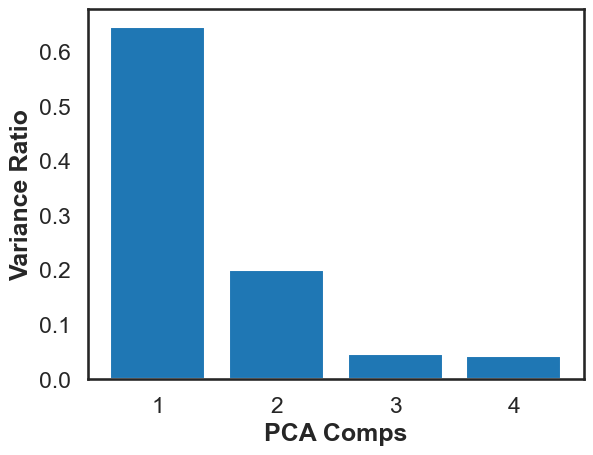

In [554]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Comps", fontweight = 'bold')
plt.ylabel("Variance Ratio", fontweight = 'bold')

In [555]:
df_pca_att = pd.DataFrame({'Attribute':col_names, 'PC_1':pca.components_[0],
                                                 'PC_2':pca.components_[1],
                                                 'PC_3':pca.components_[2],
                                                 'PC_4':pca.components_[3]})
df_pca_att

,Attribute,PC_1,PC_2,PC_3,PC_4
0,child_mort,-0.412738,0.385205,-0.025226,0.342567
1,exports,0.149440,0.223865,0.365628,0.207451
2,health,0.402041,0.485017,-0.613117,-0.070625
3,imports,0.153842,0.214038,0.293154,0.219048
4,income,0.310641,0.243454,0.498168,0.012657
5,inflation,-0.078685,0.034666,0.389309,-0.367399
6,life_expec,0.381031,-0.197918,0.033558,-0.560840
7,total_fer,-0.490845,0.505638,0.033244,-0.580474
8,gdpp,0.364976,0.406367,0.043181,0.002790


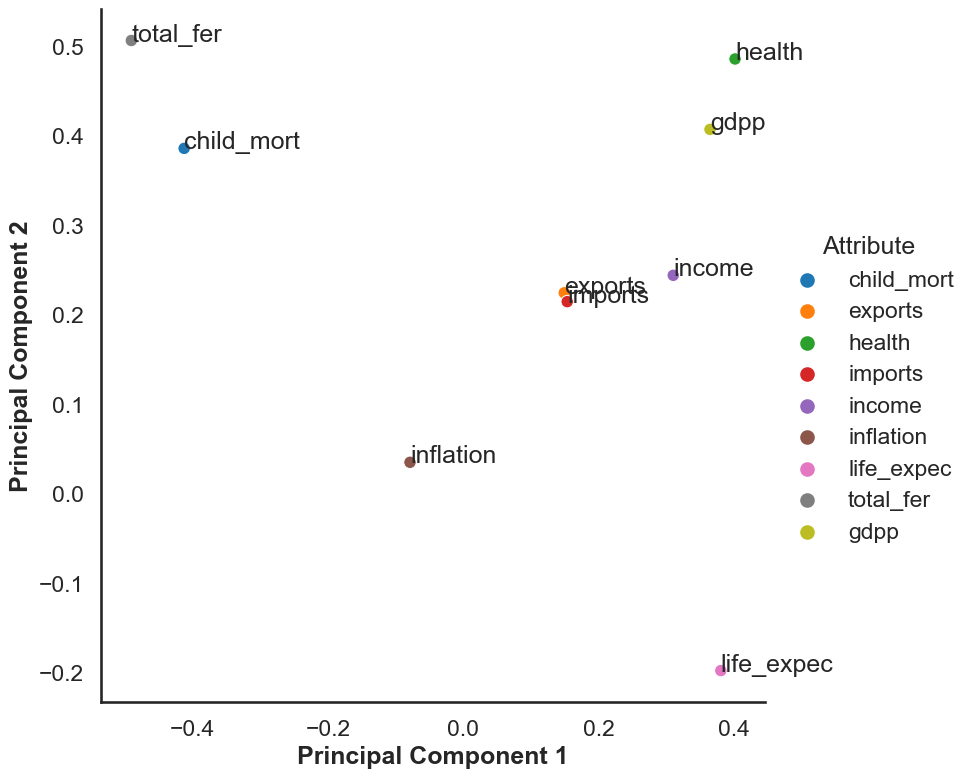

In [556]:
sns.pairplot(data = df_pca_att, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

#annotating for clarity purpose

for i,txt in enumerate(df_pca_att.Attribute):
    plt.annotate(txt, (df_pca_att.PC_1[i],df_pca_att.PC_2[i]))

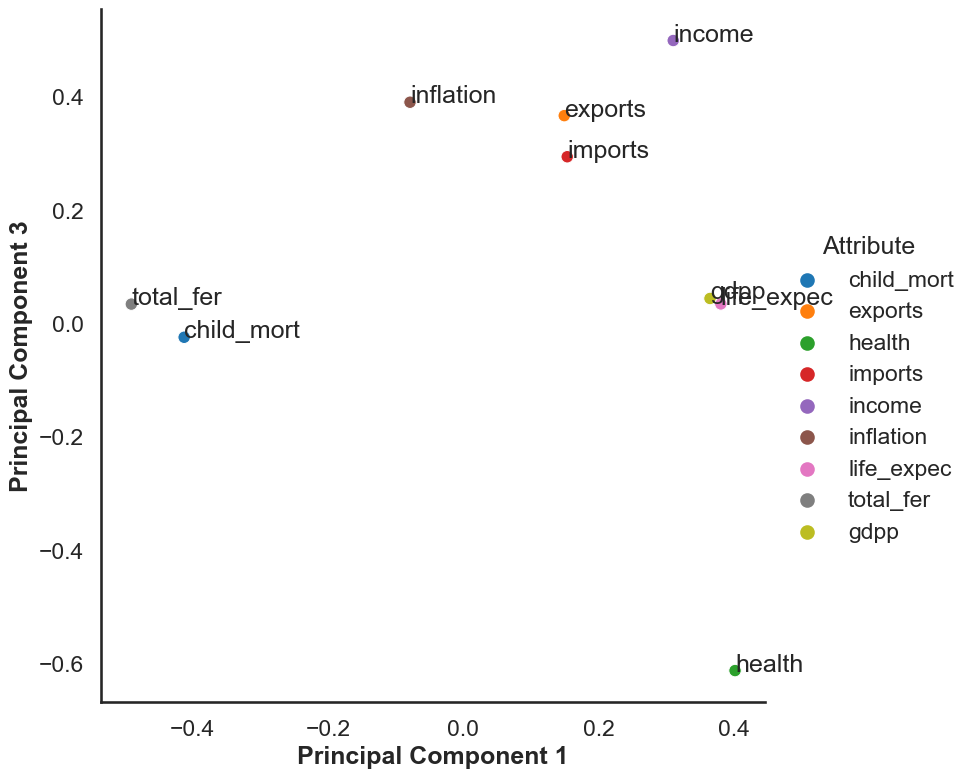

In [557]:
sns.pairplot(data = df_pca_att, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

#annotating for clarity purpose

for i,txt in enumerate(df_pca_att.Attribute):
    plt.annotate(txt, (df_pca_att.PC_1[i],df_pca_att.PC_3[i]))

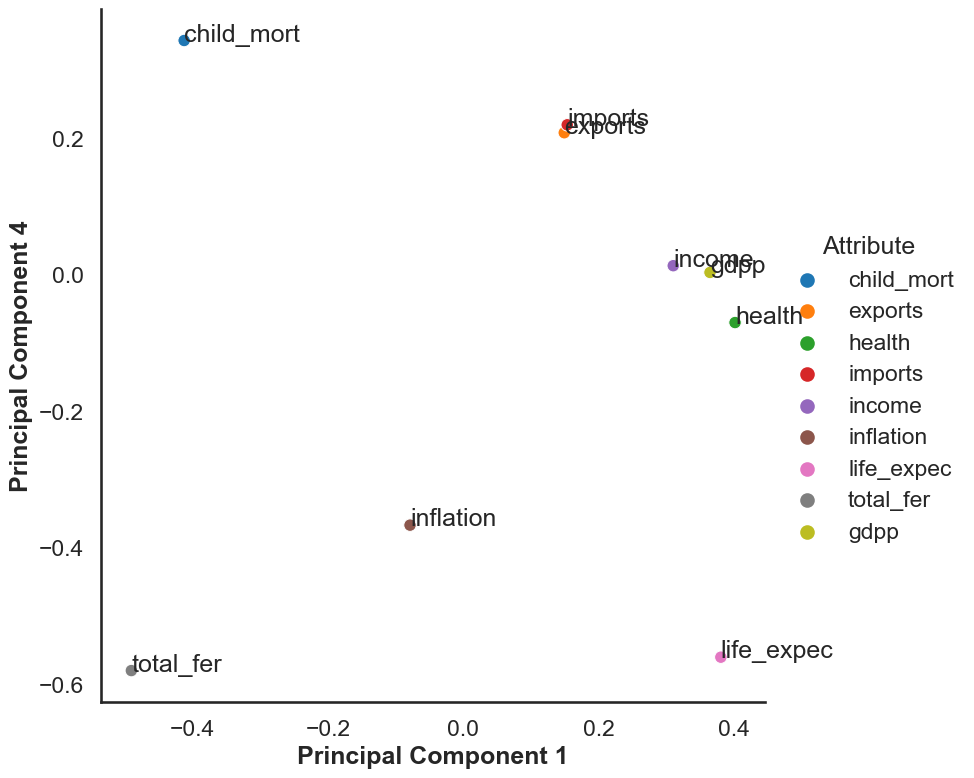

In [558]:
sns.pairplot(data = df_pca_att, x_vars=["PC_1"], y_vars=["PC_4"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 4",fontweight = 'bold')

#annotating for clarity purpose

for i,txt in enumerate(df_pca_att.Attribute):
    plt.annotate(txt, (df_pca_att.PC_1[i],df_pca_att.PC_4[i]))

In [559]:
data_scaled.shape

(167, 10)

In [560]:
x_pca.shape

(167, 4)

In [561]:
x_pca

array([[-5.77524132e-01,  2.29501473e-01, -1.73809577e-02,
        -3.44314230e-02],
       [ 9.41550064e-02, -2.74653530e-01, -1.03610462e-02,
         2.19558532e-02],
       [-2.55318369e-02, -1.50250042e-01,  5.45555236e-02,
        -1.14602357e-01],
       [-6.14971010e-01,  3.27219353e-01,  5.10761739e-02,
        -1.00354908e-01],
       [ 1.57466299e-01, -1.62656702e-01,  8.18916014e-03,
        -1.77332688e-02],
       [ 9.71012441e-02, -1.40464223e-01,  5.08452279e-02,
        -1.00813418e-01],
       [ 4.52173787e-02, -2.73999645e-01, -6.85588678e-03,
         4.22091861e-02],
       [ 6.01277059e-01,  2.12113852e-01, -1.36460180e-01,
        -8.21099604e-02],
       [ 6.68571432e-01,  2.30610269e-01, -1.30186339e-01,
         6.96962054e-03],
       [-7.43478349e-03, -1.55396229e-01,  3.91879631e-02,
         8.41548688e-02],
       [ 2.91803028e-01, -2.73951488e-03, -6.65579654e-02,
         5.32279128e-02],
       [ 2.57001790e-01, -5.03716253e-02,  1.24615533e-01,
      

Text(0.5, 0, 'PC3')

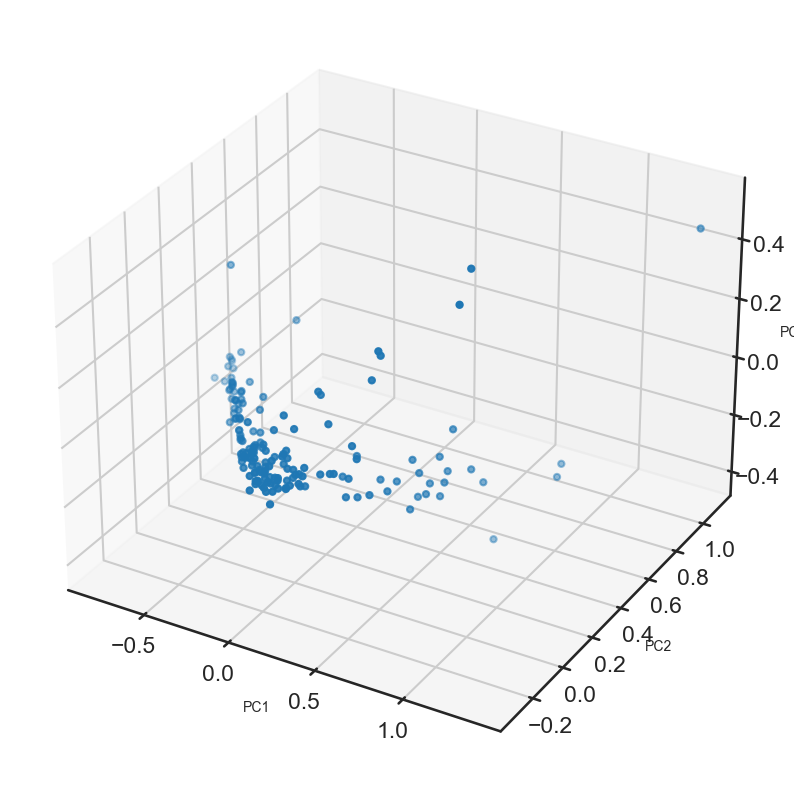

In [562]:


# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],)
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [563]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [564]:
inc_pca = IncrementalPCA(n_components=5)

#fitting scaled_df on incremental PCA


df_inc_pca = inc_pca.fit_transform(data_scaled[col_names])

df_inc_pca = pd.DataFrame(df_inc_pca, columns = ['PC_1','PC_2','PC_3','PC_4','PC_5'])
df_pca_final = pd.concat([data_scaled['country'],df_inc_pca], axis = 1)
df_pca_final

,country,PC_1,PC_2,PC_3,PC_4,PC_5
0,Afghanistan,0.577541,0.229421,0.015835,0.038970,-0.049483
1,Albania,-0.094166,-0.274637,0.012818,-0.021861,-0.012504
2,Algeria,0.025511,-0.150168,-0.058374,0.109930,0.013328
3,Angola,0.614975,0.327283,-0.055941,0.095454,0.025947
4,Antigua and Barbuda,-0.157461,-0.162691,-0.008499,0.020655,-0.059316
...,...,...,...,...,...,...
162,Vanuatu,0.199769,-0.076878,0.041299,-0.020942,-0.053665
163,Venezuela,-0.063015,-0.115914,-0.157259,0.157897,0.260206
164,Vietnam,0.004777,-0.256204,0.000163,-0.018478,0.039025
165,Yemen,0.334225,0.045429,-0.055127,0.152375,0.033717


In [565]:
from sklearn.metrics import silhouette_score
num_clusters = [2,3,4,5,6,7,8,9]                                        # selecting range of clusters
for i in num_clusters:                                                # For loop
    kmeans=KMeans(n_clusters=i,max_iter=50)                            # Using iteration 50 for finding Kmeans
    kmeans.fit(df_inc_pca)                                             # fitting the kmeans
    cluster_label=kmeans.labels_                                        # saving the labels in a cluster_label list
    
    sil_score = silhouette_score(df_inc_pca,cluster_label)        # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,sil_score)) 

For no. of cluster=2,silhouette score is 0.42250061313816417
For no. of cluster=3,silhouette score is 0.5029323385293502
For no. of cluster=4,silhouette score is 0.4807356842660269
For no. of cluster=5,silhouette score is 0.3752748710202823
For no. of cluster=6,silhouette score is 0.3631308998940337
For no. of cluster=7,silhouette score is 0.3178395174407556
For no. of cluster=8,silhouette score is 0.341159335108201
For no. of cluster=9,silhouette score is 0.3406283945761867


In [566]:
import plotly.graph_objects as go
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=150)
    kmeans.fit(data_scaled[col_names])
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
ssddf = pd.DataFrame(ssd)
ssddf.columns = ['SSD']
fig = go.Figure(data=go.Scatter(x=range_n_clusters, y=ssddf['SSD']))
fig.update_layout(height=500, width=800, title_text="SSD/Elbow Curve", shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 4, x1= 4
    )
] )
fig.show()

In [567]:
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=42)         # k=4 and iteration=50
kmeans.fit(df_inc_pca) 
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [568]:
data['Cluster_id'] = kmeans.labels_
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500.0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310.0,1


<AxesSubplot: title={'center': 'Cluster level vs GDPP per capita'}, xlabel='Cluster_id', ylabel='gdpp'>

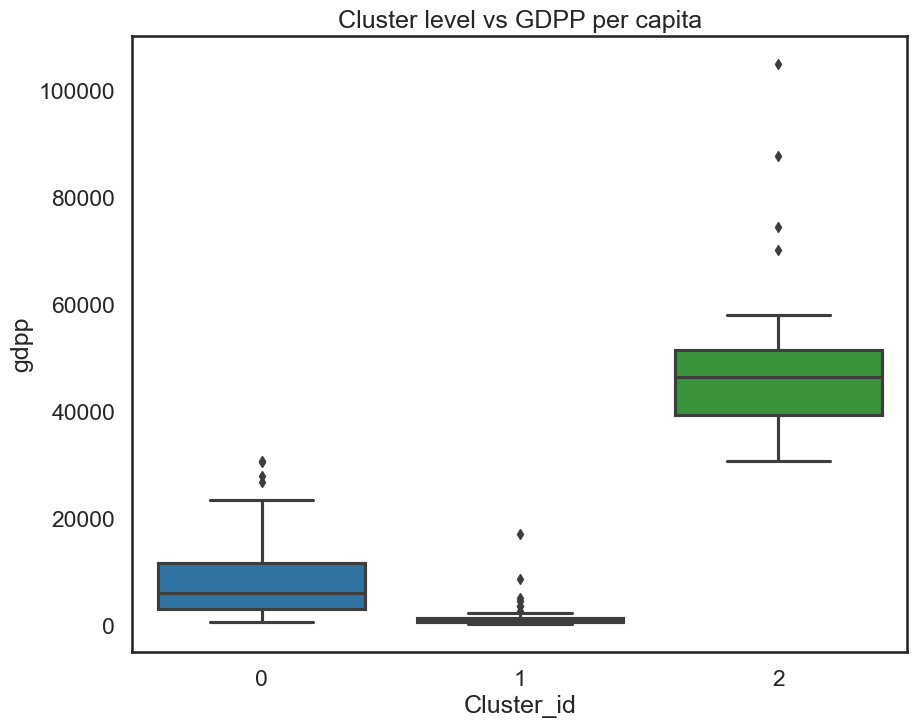

In [569]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x = 'Cluster_id',y = 'gdpp',data = data)

<AxesSubplot: title={'center': 'Cluster level vs GDPP per capita'}, xlabel='Cluster_id', ylabel='income'>

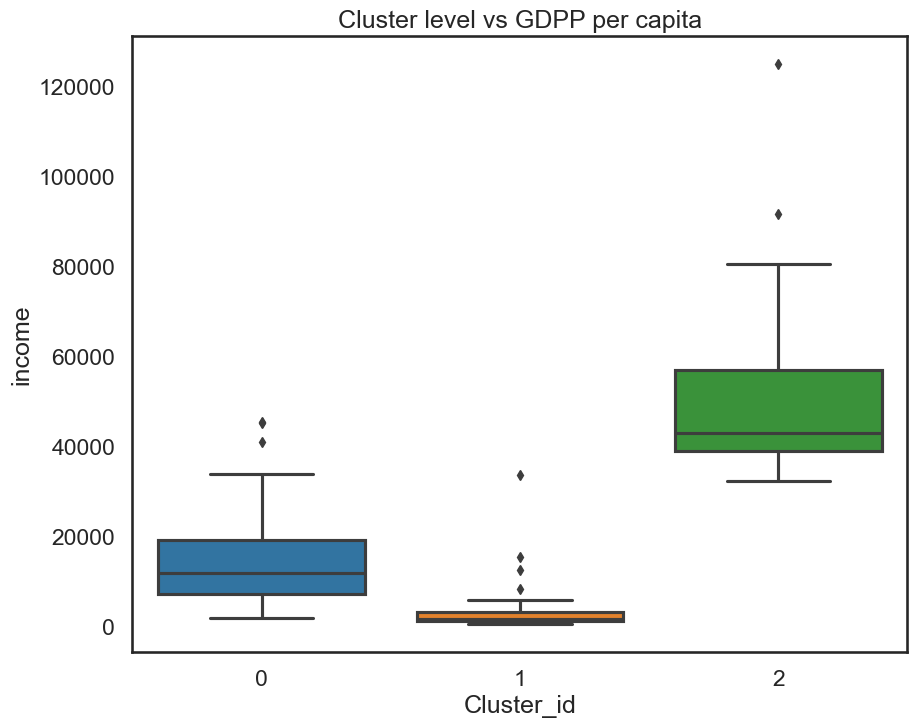

In [570]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x = 'Cluster_id',y = 'income',data = data)

<AxesSubplot: title={'center': 'Cluster level vs child_mort per capita'}, xlabel='Cluster_id', ylabel='child_mort'>

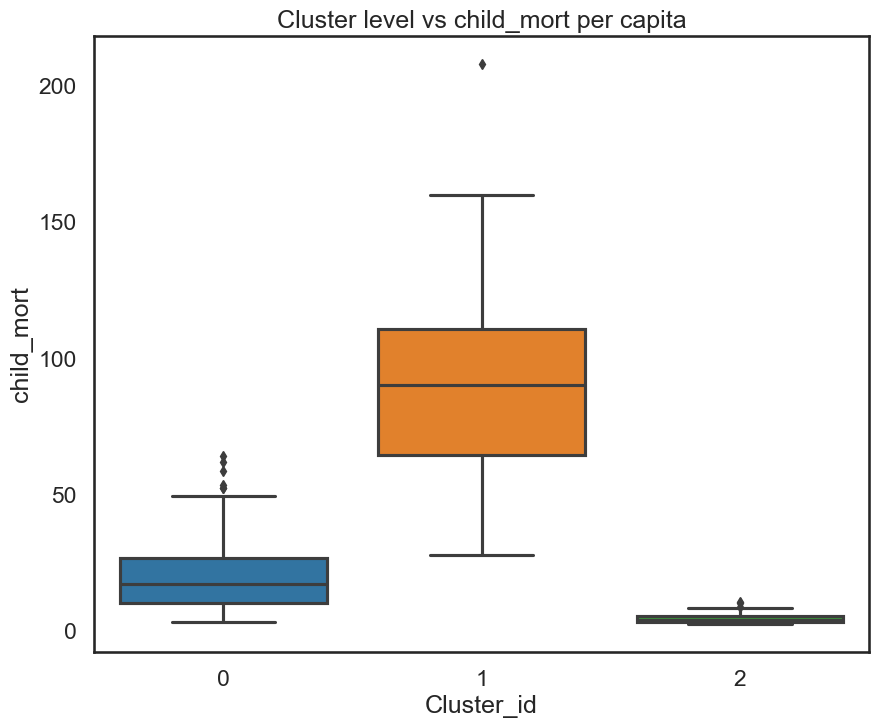

In [571]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs child_mort per capita')
sns.boxplot(x = 'Cluster_id',y = 'child_mort',data = data)

<AxesSubplot: title={'center': 'Cluster level vs health per capita'}, xlabel='Cluster_id', ylabel='health'>

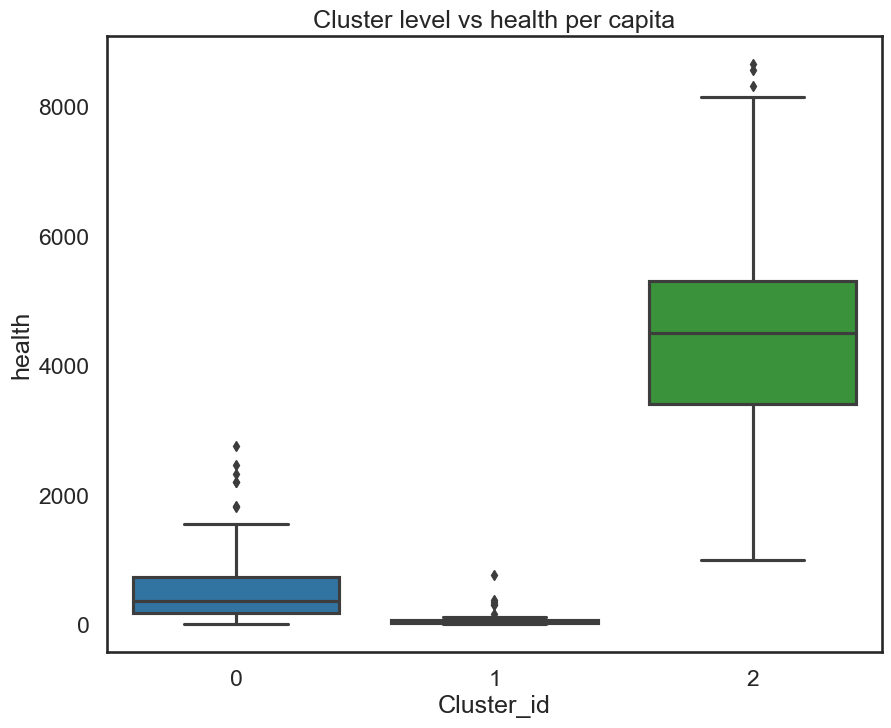

In [572]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs health per capita')
sns.boxplot(x = 'Cluster_id',y = 'health',data = data)

<AxesSubplot: title={'center': 'Cluster level vs import per capita'}, xlabel='Cluster_id', ylabel='imports'>

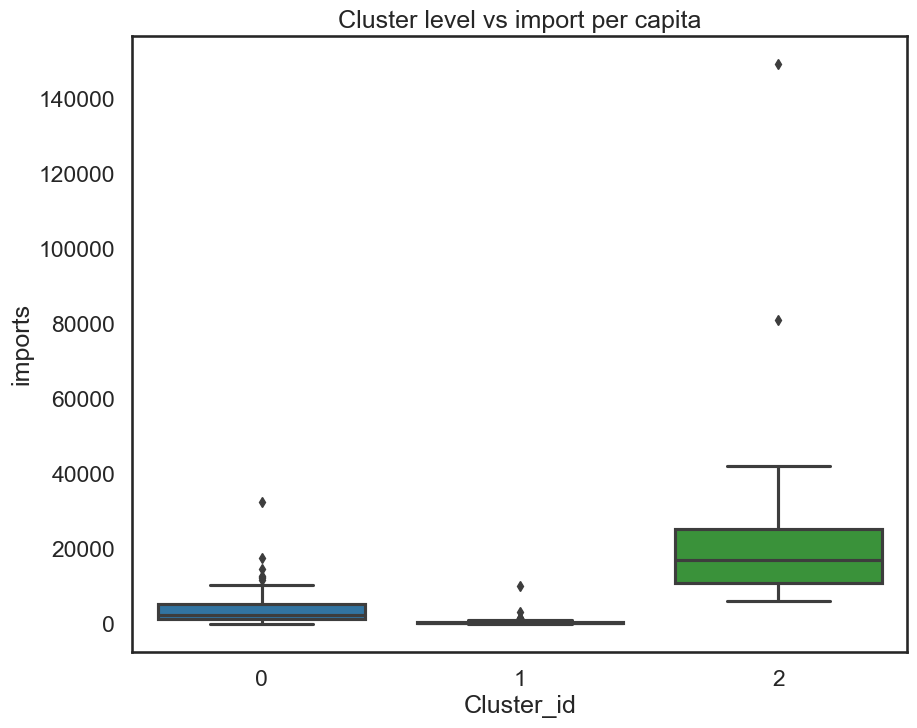

In [573]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs import per capita')
sns.boxplot(x = 'Cluster_id',y = 'imports',data = data)

<AxesSubplot: title={'center': 'Cluster level vs export per capita'}, xlabel='Cluster_id', ylabel='exports'>

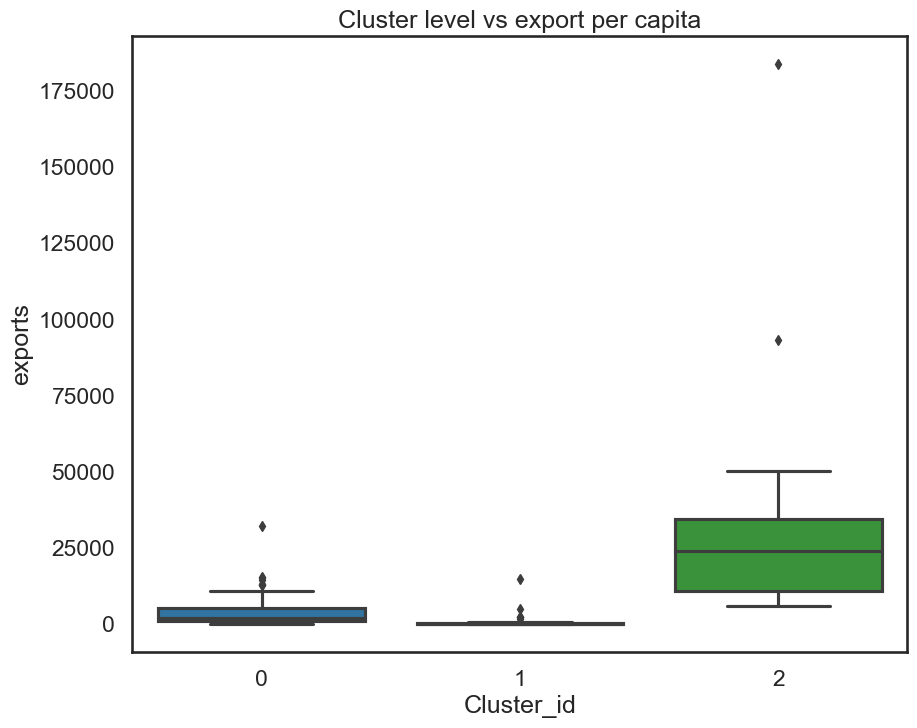

In [574]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs export per capita')
sns.boxplot(x = 'Cluster_id',y = 'exports',data = data)

<AxesSubplot: title={'center': 'Cluster level vs life_expec'}, xlabel='Cluster_id', ylabel='life_expec'>

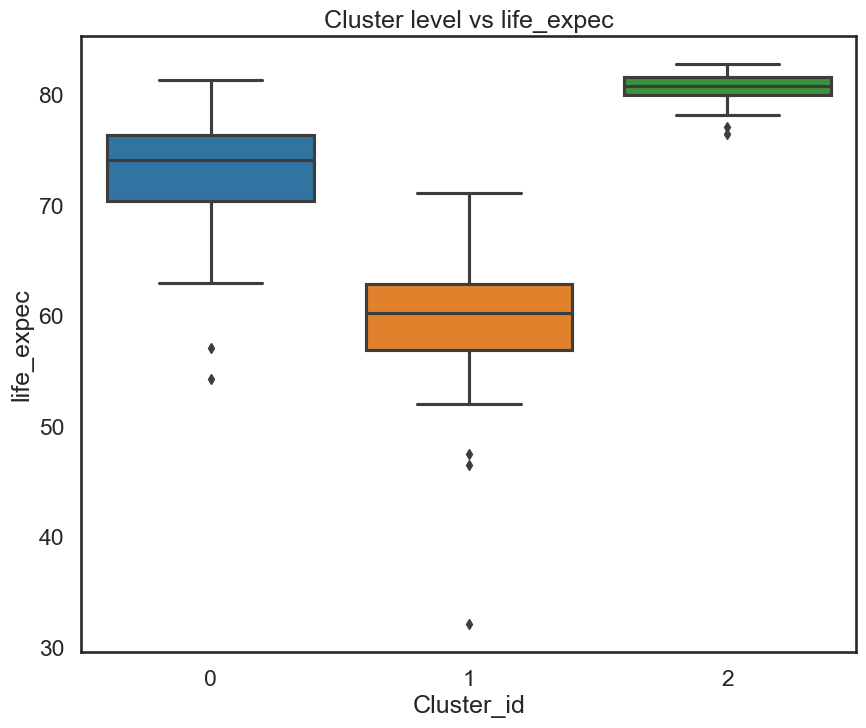

In [575]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs life_expec')
sns.boxplot(x = 'Cluster_id',y = 'life_expec',data = data)

<AxesSubplot: title={'center': 'Cluster level vs total_fer'}, xlabel='Cluster_id', ylabel='total_fer'>

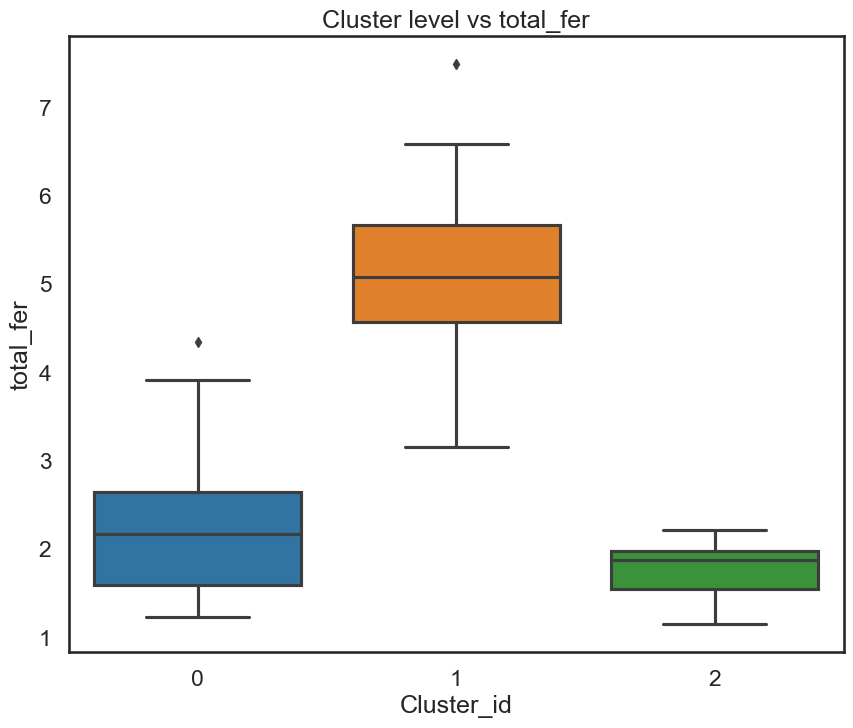

In [576]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs total_fer')
sns.boxplot(x = 'Cluster_id',y = 'total_fer',data = data)

<AxesSubplot: title={'center': 'Cluster level vs inflation per capita'}, xlabel='Cluster_id', ylabel='inflation'>

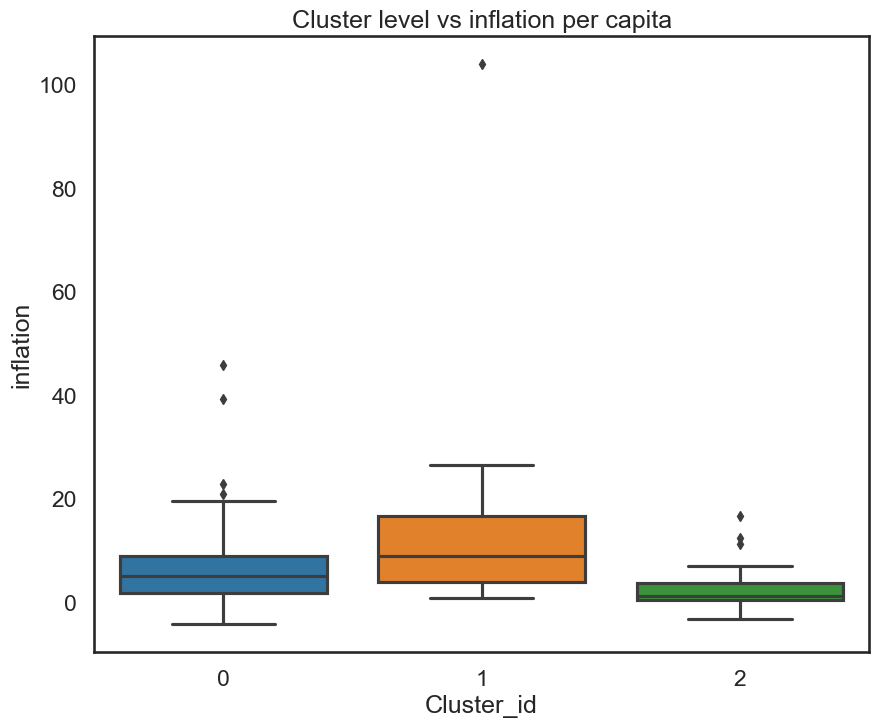

In [577]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs inflation per capita')
sns.boxplot(x = 'Cluster_id',y = 'inflation',data = data)

In [578]:
df_pca_final['Cluster_ID'] = kmeans.labels_
df_pca_final.set_index(data['country'],inplace = True)
df_pca_final

,country,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster_ID
country,,,,,,,
Afghanistan,Afghanistan,0.577541,0.229421,0.015835,0.038970,-0.049483,1
Albania,Albania,-0.094166,-0.274637,0.012818,-0.021861,-0.012504,0
Algeria,Algeria,0.025511,-0.150168,-0.058374,0.109930,0.013328,0
Angola,Angola,0.614975,0.327283,-0.055941,0.095454,0.025947,1
Antigua and Barbuda,Antigua and Barbuda,-0.157461,-0.162691,-0.008499,0.020655,-0.059316,0
...,...,...,...,...,...,...,...
Vanuatu,Vanuatu,0.199769,-0.076878,0.041299,-0.020942,-0.053665,0
Venezuela,Venezuela,-0.063015,-0.115914,-0.157259,0.157897,0.260206,0
Vietnam,Vietnam,0.004777,-0.256204,0.000163,-0.018478,0.039025,0


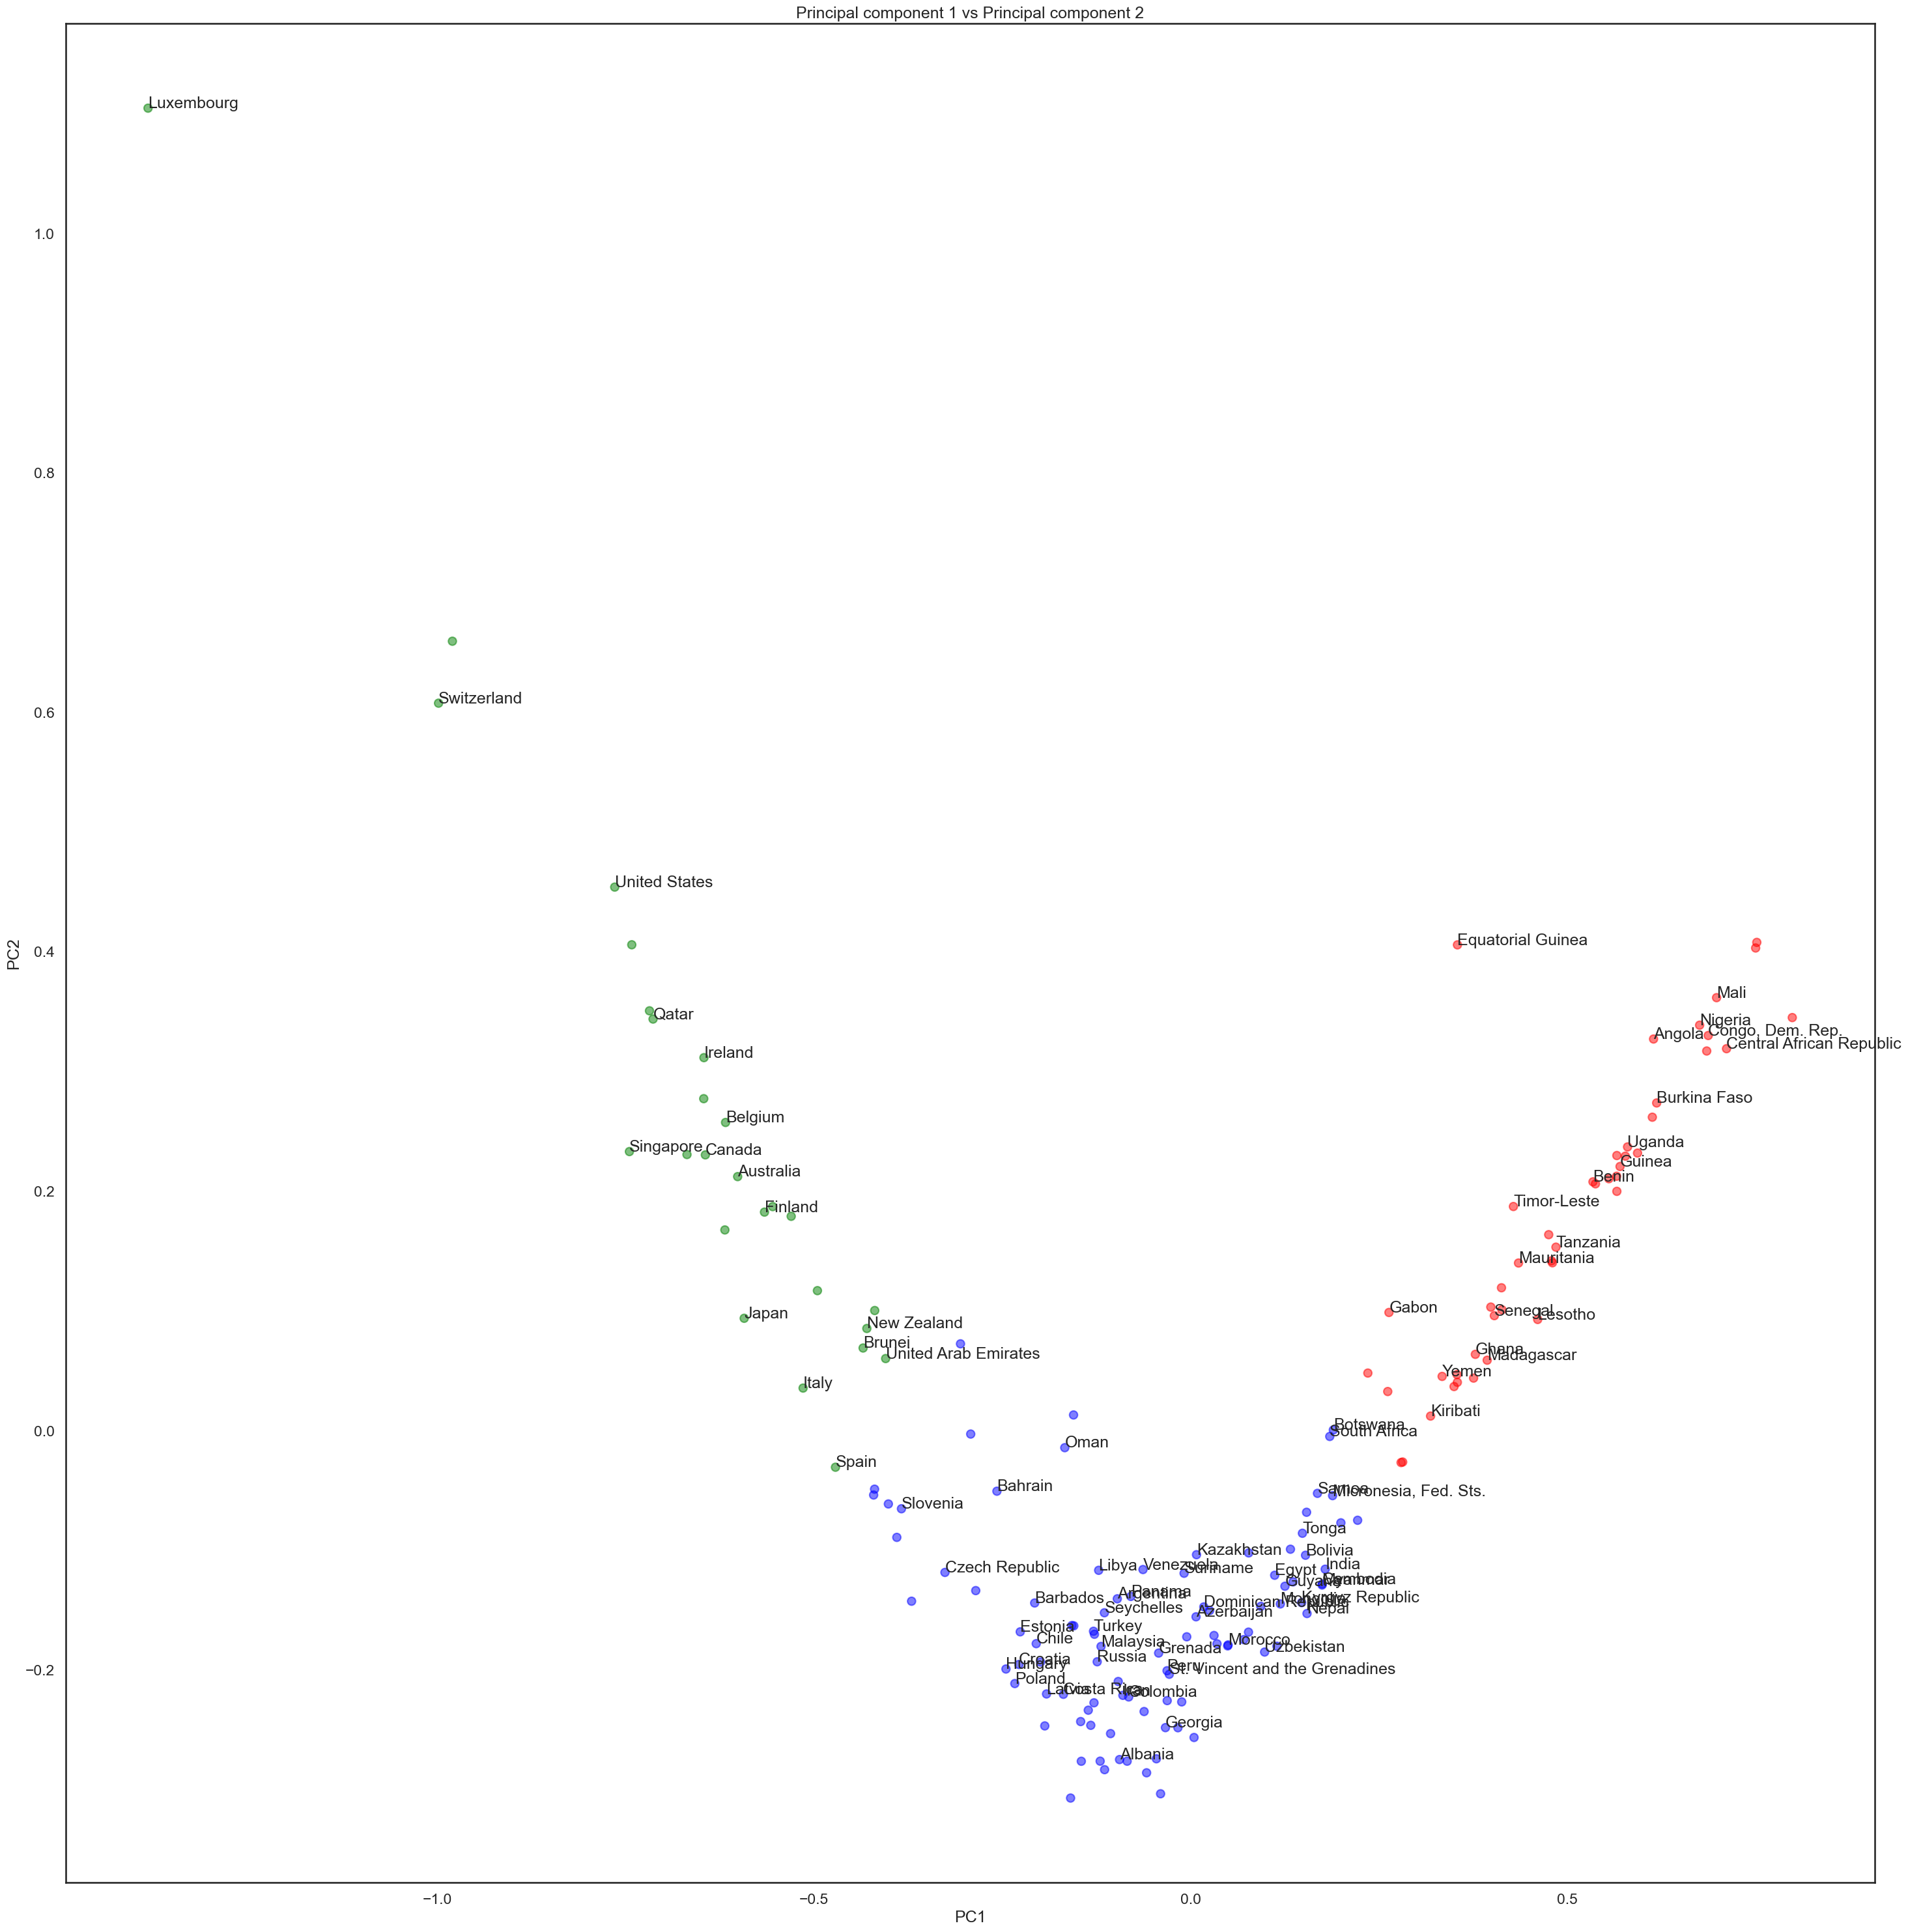

In [579]:
%matplotlib inline
sns.set_style('white')
sns.set_context('talk')

fig = plt.figure(figsize = (30,30))   # setting the figure size

# setting title

plt.title("Principal component 1 vs Principal component 2")

# Plotting a scatter plot

plt.scatter(df_pca_final['PC_1'] , df_pca_final['PC_2'] ,
            c = df_pca_final.Cluster_ID.map({0:'blue',1:'red',2:'green'}), alpha = 0.5)

# labeling different cluster points with country names 
for i, txt in enumerate(df_pca_final.index):
    if i%2:
        plt.annotate(txt, (df_pca_final.PC_1[i],df_pca_final.PC_2[i]))
    
# labeling the axes

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()   
plt.show()

In [588]:
Country_help = pd.DataFrame(data[data['Cluster_id'] == 0].index)

print(Country_help.shape)


(95, 1)


In [592]:
list_of_countries_in_need_of_help=data['country'][data['Cluster_id']==0]
list_of_countries_in_need_of_help

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 95, dtype: object

In [580]:
Country_help = pd.DataFrame(data[data['Cluster_id'] == 1].index)

print(Country_help.shape)



(46, 1)


In [593]:
list_of_countries_in_urgent_need_of_help=data['country'][data['Cluster_id']==1]
list_of_countries_in_urgent_need_of_help

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     

In [587]:
Country_help = pd.DataFrame(data[data['Cluster_id'] == 2].index)

print(Country_help.shape)



(26, 1)


In [594]:
list_countries_in_good_condition=data['country'][data['Cluster_id']==2]
list_countries_in_good_condition


7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

by analysing the above boxplot and clutter plot of the companies we can conclude that the 2nd cluster contains those countries which are in good position whereas companies in 1st cluster are the one which are in urgent need of aid and have worse conditions whereas companies placed in cluster 0 are b/w cluster1 an cluster2 and have better condition than that of cluster1 countries but are also in need of aid